In [2]:
import os
base_dir = '/home/garimachahar/learnTensorflow/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [3]:
train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
print(train_dog_fnames[:10])

print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

['cat.82.jpg', 'cat.207.jpg', 'cat.227.jpg', 'cat.374.jpg', 'cat.346.jpg', 'cat.791.jpg', 'cat.735.jpg', 'cat.385.jpg', 'cat.692.jpg', 'cat.992.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']
total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500


In [4]:
from tensorflow.keras import layers
from tensorflow.keras import Model

In [6]:
# Our input feature map is 150x150x3: 150x150 for the image pixels, and 3 for
# the three color channels: R, G, and B
img_input = layers.Input(shape=(150, 150, 3))

# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

In [7]:
# Flatten feature map to a 1-dim tensor so we can add fully connected layers
x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512, activation='relu')(x)

# Create output layer with a single node and sigmoid activation
output = layers.Dense(1, activation='sigmoid')(x)

# Create model:
# input = input feature map
# output = input feature map + stacked convolution/maxpooling layers + fully 
# connected layer + sigmoid output layer
model = Model(img_input, output)

In [8]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 64)        0     

In [9]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
#train_datagen updated to do image augmentation
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [11]:
#Training along with validation 
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/100
100/100 - 45s - loss: 0.8110 - acc: 0.5195 - val_loss: 0.6843 - val_acc: 0.5870
Epoch 2/100
100/100 - 40s - loss: 0.6959 - acc: 0.5700 - val_loss: 0.7331 - val_acc: 0.5550
Epoch 3/100
100/100 - 41s - loss: 0.6936 - acc: 0.5860 - val_loss: 0.6402 - val_acc: 0.6180
Epoch 4/100
100/100 - 41s - loss: 0.6547 - acc: 0.6240 - val_loss: 0.6340 - val_acc: 0.6020
Epoch 5/100
100/100 - 41s - loss: 0.6395 - acc: 0.6330 - val_loss: 0.5998 - val_acc: 0.6690
Epoch 6/100
100/100 - 41s - loss: 0.6185 - acc: 0.6610 - val_loss: 0.6201 - val_acc: 0.6420
Epoch 7/100
100/100 - 41s - loss: 0.6258 - acc: 0.6645 - val_loss: 0.5950 - val_acc: 0.6870
Epoch 8/100
100/100 - 41s - loss: 0.6139 - acc: 0.6700 - val_loss: 0.5866 - val_acc: 0.6690
Epoch 9/100
100/100 - 41s - loss: 0.6147 - acc: 0.6710 - val_loss: 0.6066 - val_acc: 0.6990
Epo

Epoch 85/100
100/100 - 41s - loss: 0.4603 - acc: 0.7985 - val_loss: 0.4354 - val_acc: 0.8080
Epoch 86/100
100/100 - 41s - loss: 0.4595 - acc: 0.7820 - val_loss: 0.4572 - val_acc: 0.8050
Epoch 87/100
100/100 - 41s - loss: 0.4703 - acc: 0.7765 - val_loss: 0.4453 - val_acc: 0.7910
Epoch 88/100
100/100 - 43s - loss: 0.4676 - acc: 0.7715 - val_loss: 0.4702 - val_acc: 0.7980
Epoch 89/100
100/100 - 43s - loss: 0.4700 - acc: 0.7850 - val_loss: 0.4716 - val_acc: 0.7970
Epoch 90/100
100/100 - 41s - loss: 0.4590 - acc: 0.7855 - val_loss: 0.4776 - val_acc: 0.7820
Epoch 91/100
100/100 - 41s - loss: 0.4647 - acc: 0.7920 - val_loss: 0.4399 - val_acc: 0.8030
Epoch 92/100
100/100 - 42s - loss: 0.4496 - acc: 0.7965 - val_loss: 0.4704 - val_acc: 0.7990
Epoch 93/100
100/100 - 42s - loss: 0.4731 - acc: 0.7875 - val_loss: 0.4416 - val_acc: 0.7980
Epoch 94/100
100/100 - 47s - loss: 0.4590 - acc: 0.7945 - val_loss: 0.4787 - val_acc: 0.7850
Epoch 95/100
100/100 - 42s - loss: 0.4641 - acc: 0.7875 - val_loss: 0.

Text(0.5, 1.0, 'Training and validation loss')

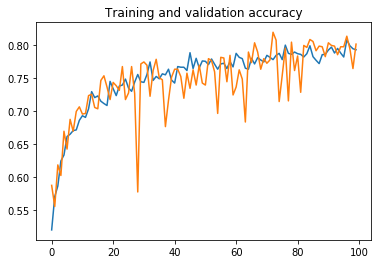

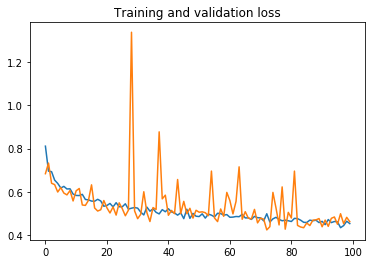

In [13]:
import matplotlib.pyplot as plt
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')